In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [147]:
import warnings
warnings.filterwarnings("ignore")

In [148]:
df=pd.read_csv('water_potability.csv')

In [149]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,?,204.890456,20791.31898,7.300212,368.5164413,564.308654,10.379783,86.990970,2.963135,0
1,3.716080075,129.422921,18630.05786,6.635246,?,592.885359,15.180013,56.329076,4.500656,0
2,8.099124189,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316765884,214.373394,22018.41744,8.059332,356.8861356,363.266516,18.436525,100.341674,4.628771,0
4,9.092223456,181.101509,17978.98634,6.546600,310.1357375,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3272,7.808856018,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510316,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126762923,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671358,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [150]:
df.describe()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3115.000000,3277.000000,3277.000000
mean,196.372096,22013.719388,7.122331,426.247254,14.283779,66.402904,3.966480,0.389991
std,32.875080,8767.258442,1.582846,80.847730,3.308360,16.176620,0.780460,0.487822
min,47.432000,320.942611,0.352000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,176.853696,15668.273620,6.127804,365.739122,12.065317,55.853106,3.439623,0.000000
50%,196.982379,20922.154460,7.130437,421.890083,14.217373,66.623944,3.954964,0.000000
75%,216.665319,27331.361960,8.114731,481.853415,16.557177,77.349886,4.500208,1.000000
max,323.124000,61227.196010,13.127000,753.342620,28.300000,124.000000,6.739000,1.000000


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2787 non-null   object 
 1   Hardness         3277 non-null   float64
 2   Solids           3277 non-null   float64
 3   Chloramines      3277 non-null   float64
 4   Sulfate          2497 non-null   object 
 5   Conductivity     3277 non-null   float64
 6   Organic_carbon   3277 non-null   float64
 7   Trihalomethanes  3115 non-null   float64
 8   Turbidity        3277 non-null   float64
 9   Potability       3277 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 256.1+ KB


# handling null value

In [152]:
df.isna().sum()

ph                 490
Hardness             0
Solids               0
Chloramines          0
Sulfate            780
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [153]:
df.median()

Hardness             196.982379
Solids             20922.154460
Chloramines            7.130437
Conductivity         421.890083
Organic_carbon        14.217373
Trihalomethanes       66.623944
Turbidity              3.954964
Potability             0.000000
dtype: float64

In [154]:
for column in df.columns:
    df[column]=df[column].replace('?',np.nan)

In [155]:
for column in df.columns:
    df[column]=df[column].replace(np.nan,df[column].median())

In [156]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890456,20791.31898,7.300212,368.5164413,564.308654,10.379783,86.990970,2.963135,0
1,3.716080075,129.422921,18630.05786,6.635246,333.076588,592.885359,15.180013,56.329076,4.500656,0
2,8.099124189,224.236259,19909.54173,9.275884,333.076588,418.606213,16.868637,66.420093,3.055934,0
3,8.316765884,214.373394,22018.41744,8.059332,356.8861356,363.266516,18.436525,100.341674,4.628771,0
4,9.092223456,181.101509,17978.98634,6.546600,310.1357375,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3272,7.808856018,193.553212,17329.80216,8.061362,333.076588,392.449580,19.903225,66.623944,2.798243,1
3273,9.419510316,175.762646,33155.57822,7.350233,333.076588,432.044783,11.039070,69.845400,3.298875,1
3274,5.126762923,230.603758,11983.86938,6.303357,333.076588,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671358,195.102299,17404.17706,7.509306,333.076588,327.459761,16.140368,78.698446,2.309149,1


# handling duplicates

In [157]:
df.drop_duplicates()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890456,20791.31898,7.300212,368.5164413,564.308654,10.379783,86.990970,2.963135,0
1,3.716080075,129.422921,18630.05786,6.635246,333.076588,592.885359,15.180013,56.329076,4.500656,0
2,8.099124189,224.236259,19909.54173,9.275884,333.076588,418.606213,16.868637,66.420093,3.055934,0
3,8.316765884,214.373394,22018.41744,8.059332,356.8861356,363.266516,18.436525,100.341674,4.628771,0
4,9.092223456,181.101509,17978.98634,6.546600,310.1357375,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668101687,193.681736,47580.99160,7.166639,359.9485744,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856018,193.553212,17329.80216,8.061362,333.076588,392.449580,19.903225,66.623944,2.798243,1
3273,9.419510316,175.762646,33155.57822,7.350233,333.076588,432.044783,11.039070,69.845400,3.298875,1
3274,5.126762923,230.603758,11983.86938,6.303357,333.076588,402.883113,11.168946,77.488213,4.708658,1


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3277 non-null   object 
 1   Hardness         3277 non-null   float64
 2   Solids           3277 non-null   float64
 3   Chloramines      3277 non-null   float64
 4   Sulfate          3277 non-null   object 
 5   Conductivity     3277 non-null   float64
 6   Organic_carbon   3277 non-null   float64
 7   Trihalomethanes  3277 non-null   float64
 8   Turbidity        3277 non-null   float64
 9   Potability       3277 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 256.1+ KB


In [159]:
df = df.astype({'ph':'float','Sulfate':'float'})

# handling outliers

In [160]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000
mean,7.074182,196.372096,22013.719388,7.122331,333.619742,426.247254,14.283779,66.413832,3.966480,0.389991
std,1.469816,32.875080,8767.258442,1.582846,36.143468,80.847730,3.308360,15.771651,0.780460,0.487822
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277742,176.853696,15668.273620,6.127804,317.103903,365.739122,12.065317,56.651604,3.439623,0.000000
50%,7.036752,196.982379,20922.154460,7.130437,333.076588,421.890083,14.217373,66.623944,3.954964,0.000000
75%,7.869782,216.665319,27331.361960,8.114731,350.397082,481.853415,16.557177,76.694580,4.500208,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


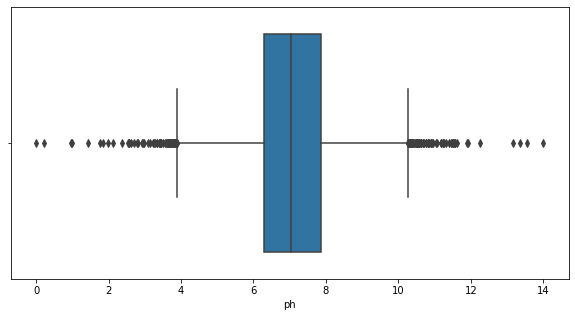

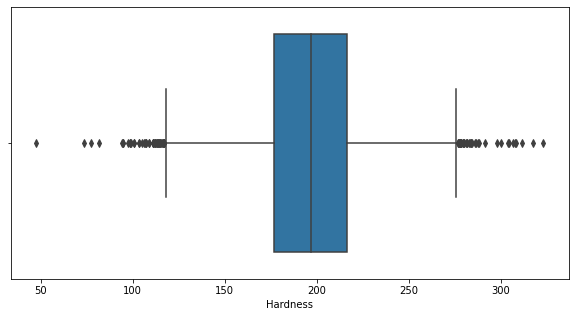

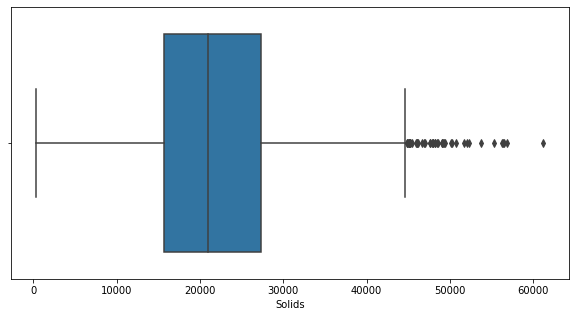

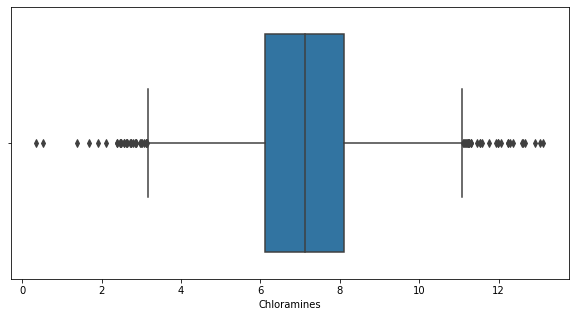

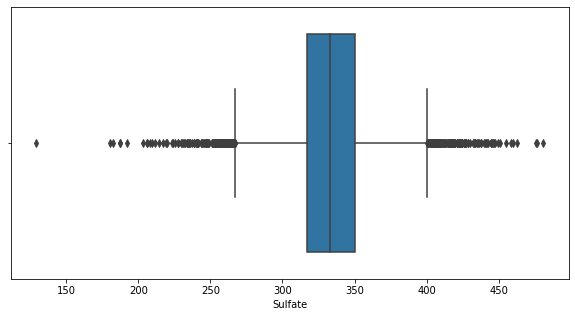

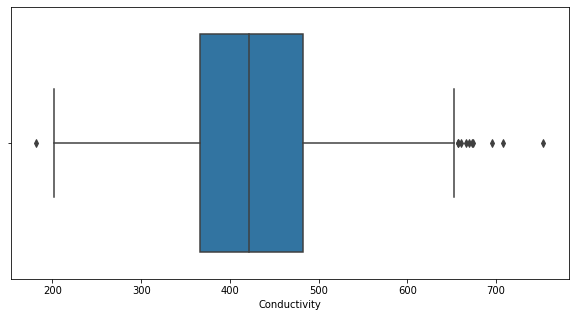

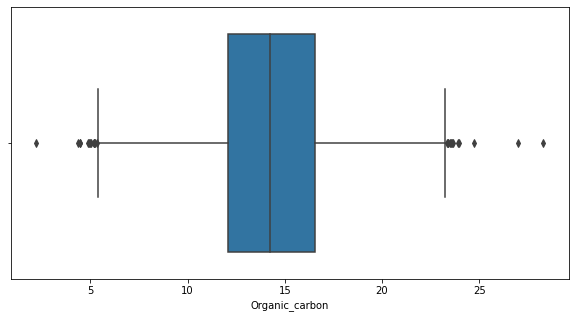

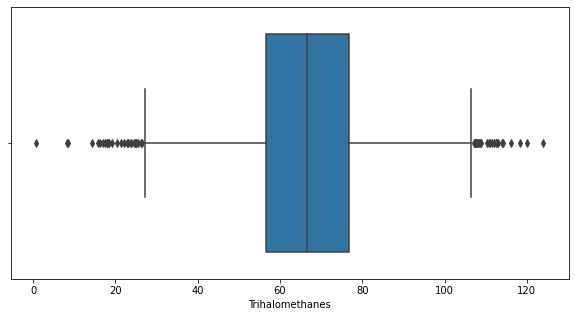

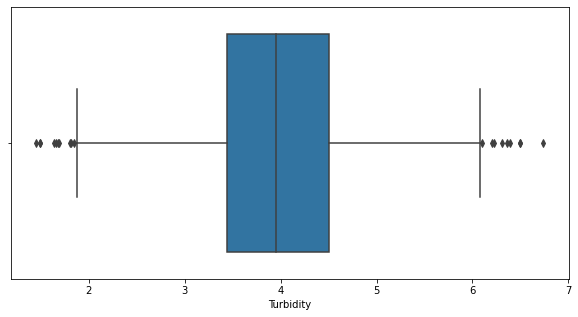

In [161]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [162]:
for column in df.columns:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    q2=q3-q1
    lower_range=q1-(1.5*q2)
    upper_range=q3+(1.5*q2)
    df[column]=np.where(df[column]<lower_range,lower_range,df[column])
    df[column]=np.where(df[column]>upper_range,upper_range,df[column])

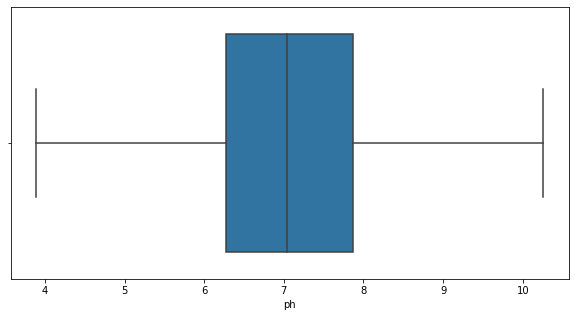

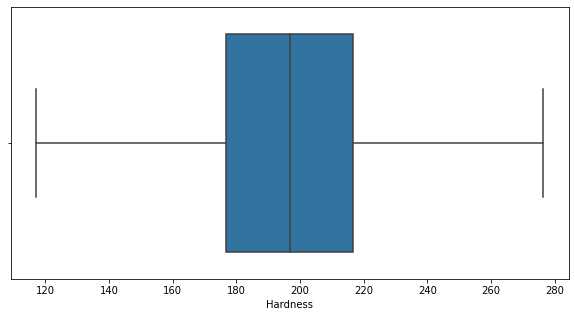

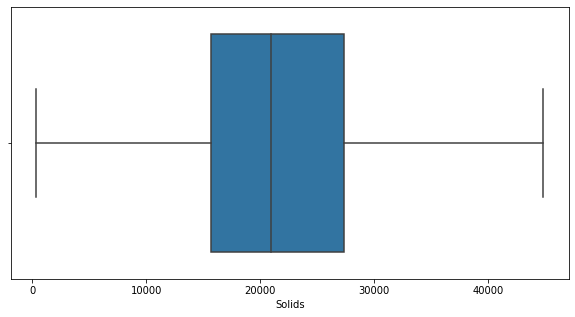

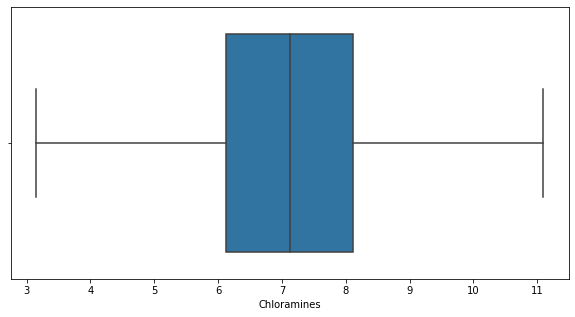

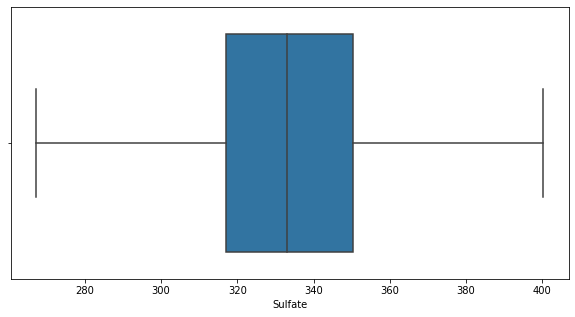

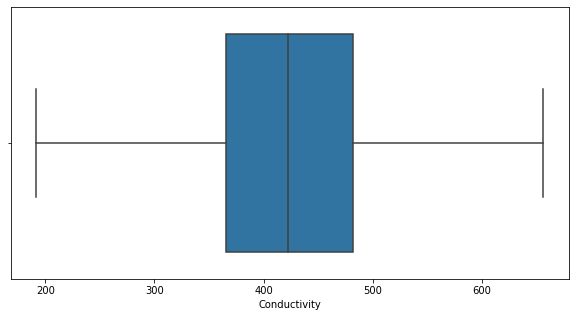

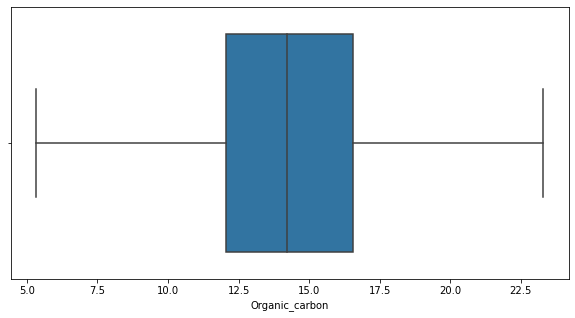

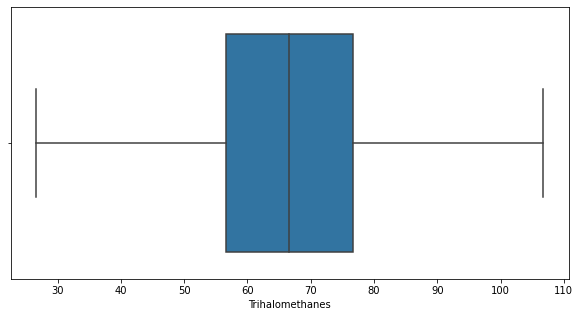

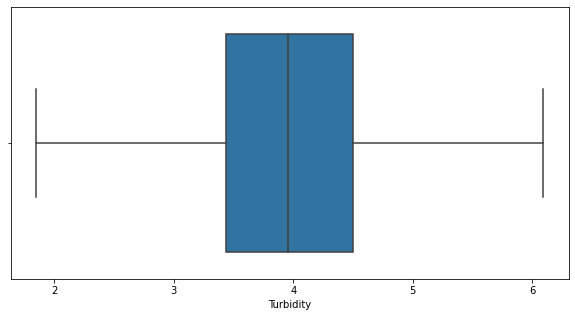

In [163]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

# data spliting

In [165]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [175]:
df['Potability'].value_counts()

0.0    1999
1.0    1278
Name: Potability, dtype: int64

In [171]:
y=df['Potability'].copy()
X=df.drop('Potability',axis=1).copy()

In [221]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=356)

# handling imbalance dataset

In [223]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0.0: 1369, 1.0: 1369})


In [226]:
y_res.value_counts(),y_test.value_counts()

(0.0    1369
 1.0    1369
 Name: Potability, dtype: int64,
 0.0    630
 1.0    354
 Name: Potability, dtype: int64)

# model training and testing

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [228]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [229]:
def models(model):
    
    print(model)
    print('_____________________________________________________________________________________________________')
    m=model.fit(X_res, y_res)
    print('train_score :',model.score(X_res, y_res)*100)
    print('test_score  :',model.score(x_test,y_test)*100)
    y_pred=model.predict(x_test)
    print(plot_confusion_matrix(m,x_test,y_test))
    print(classification_report(y_pred,y_test))


In [230]:
algos=[LogisticRegression(),DecisionTreeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier()]

LogisticRegression()
_____________________________________________________________________________________________________
train_score : 53.06793279766253
test_score  : 49.59349593495935
              precision    recall  f1-score   support

         0.0       0.50      0.63      0.56       500
         1.0       0.48      0.35      0.41       484

    accuracy                           0.50       984
   macro avg       0.49      0.49      0.48       984
weighted avg       0.49      0.50      0.49       984



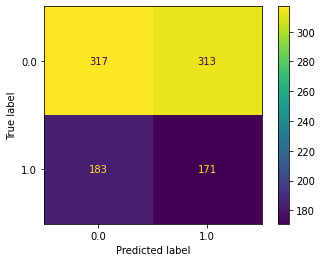

In [236]:
m=LogisticRegression()
models(m)

RandomForestClassifier()
_____________________________________________________________________________________________________
train_score : 100.0
test_score  : 54.47154471544715
              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65       660
         1.0       0.32      0.35      0.34       324

    accuracy                           0.54       984
   macro avg       0.50      0.50      0.50       984
weighted avg       0.56      0.54      0.55       984



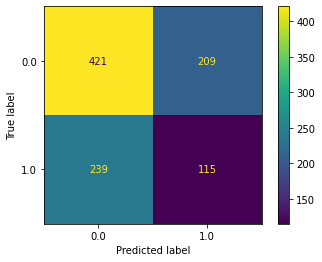

In [237]:
models(RandomForestClassifier())

DecisionTreeClassifier()
_____________________________________________________________________________________________________
train_score : 100.0
test_score  : 53.963414634146346
              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64       613
         1.0       0.38      0.37      0.38       371

    accuracy                           0.54       984
   macro avg       0.51      0.51      0.51       984
weighted avg       0.54      0.54      0.54       984



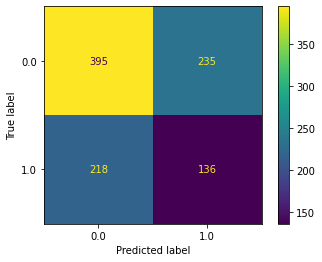

In [238]:
models(DecisionTreeClassifier())

AdaBoostClassifier()
_____________________________________________________________________________________________________
train_score : 61.796932067202334
test_score  : 48.78048780487805
              precision    recall  f1-score   support

         0.0       0.52      0.62      0.57       532
         1.0       0.43      0.33      0.37       452

    accuracy                           0.49       984
   macro avg       0.47      0.48      0.47       984
weighted avg       0.48      0.49      0.48       984



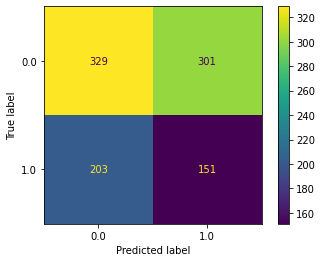

In [239]:
models(AdaBoostClassifier())

GradientBoostingClassifier()
_____________________________________________________________________________________________________
train_score : 79.69320672023375
test_score  : 51.117886178861795
              precision    recall  f1-score   support

         0.0       0.59      0.62      0.61       597
         1.0       0.37      0.34      0.35       387

    accuracy                           0.51       984
   macro avg       0.48      0.48      0.48       984
weighted avg       0.50      0.51      0.51       984



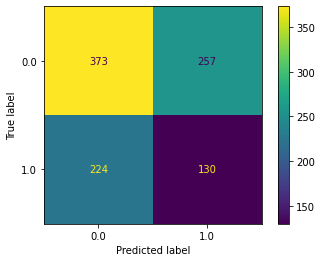

In [240]:
models(GradientBoostingClassifier())